
Missing values:
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager   

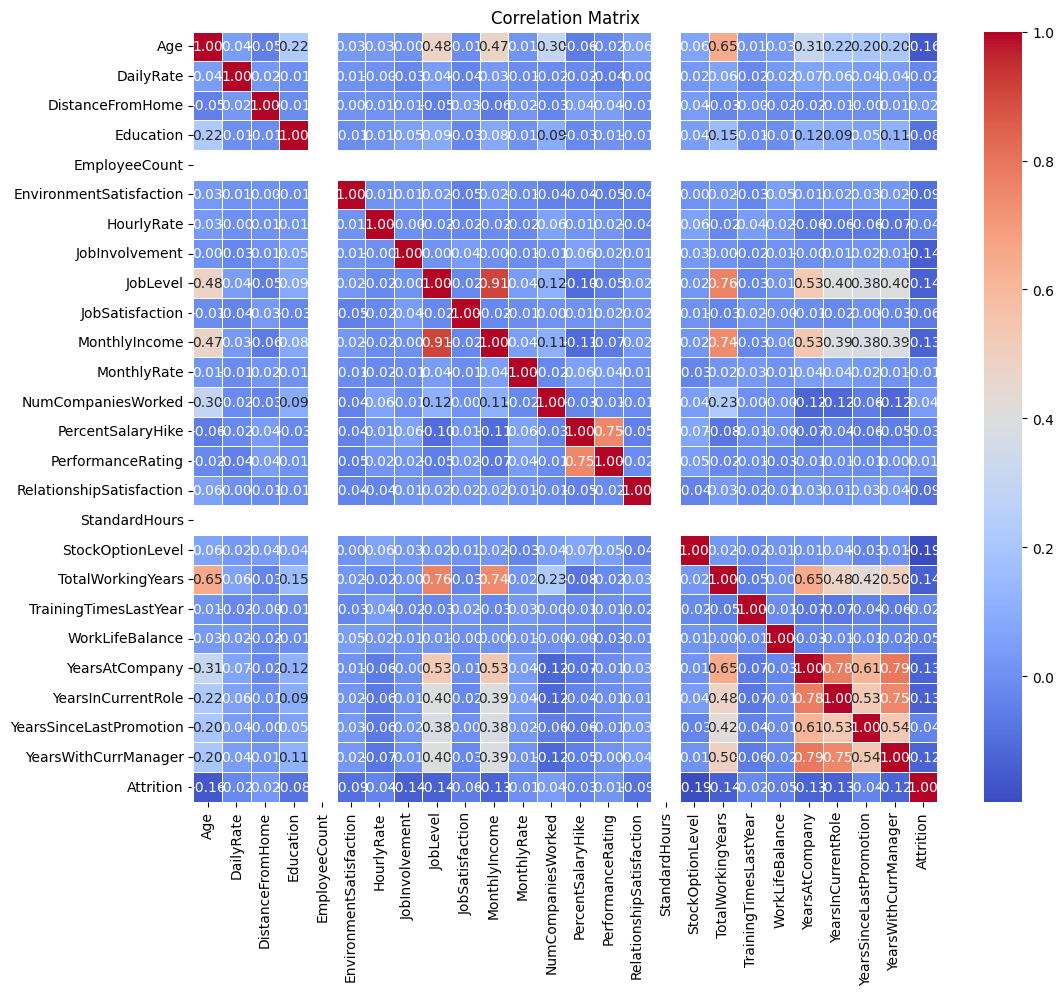


Dataset after Label Encoding:
    Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0  36.0               1      599.0           1              24.0        3.0   
1  35.0               2      921.0           2               8.0        3.0   
2  32.0               2      718.0           2              26.0        3.0   
3  38.0               2     1488.0           1               2.0        3.0   
4  50.0               2     1017.0           1               5.0        4.0   

   EducationField  EmployeeCount  EnvironmentSatisfaction  Gender  ...  \
0               3            1.0                      4.0       1  ...   
1               4            1.0                      1.0       1  ...   
2               2            1.0                      3.0       1  ...   
3               3            1.0                      3.0       0  ...   
4               3            1.0                      2.0       0  ...   

   StandardHours  StockOptionLevel  TotalWorkingY

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load the dataset
file_path = 'train.csv'
df = pd.read_csv(file_path)

# Drop 'id' column
df.drop('id', axis=1, inplace=True)

# Handling Missing Values
threshold = 0.3
# Drop columns with more than 30% missing values
df = df.dropna(thresh=len(df) * (1 - threshold), axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=[np.number]).columns] = imputer.fit_transform(df.select_dtypes(include=[np.number]))

imputer = SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include=['object']).columns] = imputer.fit_transform(df.select_dtypes(include=['object']))

# Confirm there are no missing values now
missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values)

# Summary Statistics
summary_stats = df.describe(include='all').transpose()
print("Summary Statistics:")
print(summary_stats)

# Correlation Analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

# Display correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix (optional)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Label Encoding
label_encoder = LabelEncoder()
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)

#joblib.dump(label_encoder, 'label_encoder.pkl')

# Display the dataset after Label Encoding
print("\nDataset after Label Encoding:")
print(df.head())

# One-Hot Encoding
df_onehot = pd.get_dummies(df, drop_first=True)

# Display the dataset after One-Hot Encoding
print("\nDataset after One-Hot Encoding:")
print(df_onehot.head())

# Assuming 'Attrition' is the target variable
target_column = 'Attrition'

# Select features (X) and target variable (y)
X = df_onehot.drop(target_column, axis=1)
y = df_onehot[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire training set
rf_model.fit(X_train_scaled, y_train)

# Save the model and scaler
#joblib.dump(rf_model, 'random_forest_model.pkl')
#joblib.dump(scaler, 'random_forest_scaler.pkl')

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)


In [6]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model:")
print("Accuracy:", accuracy_rf)
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(classification_rep_rf)

Random Forest Model:
Accuracy: 0.875

Confusion Matrix:
[[291   1]
 [ 41   3]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       292
         1.0       0.75      0.07      0.12        44

    accuracy                           0.88       336
   macro avg       0.81      0.53      0.53       336
weighted avg       0.86      0.88      0.83       336

